In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Ajay Verma\Downloads\archive (1)\dataset_med.csv")
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


**Column Description**  
● id: A unique identifier for each patient in the dataset.  
● age: The age of the patient at the time of diagnosis.  
● gender: The gender of the patient (e.g., male, female).  
● country: The country or region where the patient resides.  
● diagnosis_date: The date on which the patient was diagnosed with lung cancer.  
● cancer_stage: The stage of lung cancer at the time of diagnosis (e.g., Stage I, Stage II,
Stage III, Stage IV).  
● family_history: Indicates whether there is a family history of cancer (e.g., yes, no).  
● smoking_status: The smoking status of the patient (e.g., current smoker, former smoker,
never smoked, passive smoker).  
● bmi: The Body Mass Index of the patient at the time of diagnosis.  
● cholesterol_level: The cholesterol level of the patient (value).  
● hypertension: Indicates whether the patient has hypertension (high blood pressure) (e.g.,
yes, no).  
● asthma: Indicates whether the patient has asthma (e.g., yes, no).  
● cirrhosis: Indicates whether the patient has cirrhosis of the liver (e.g., yes, no).  
● other_cancer: Indicates whether the patient has had any other type of cancer in addition to
the primary diagnosis (e.g., yes, no).  
● treatment_type: The type of treatment the patient received (e.g., surgery, chemotherapy,
radiation, combined).  
● end_treatment_date: The date on which the patient completed their cancer treatment or died.  
survived: Indicates whether the patient survived (e.g., yes, no).  

**Overview of the dataset**

In [3]:
df.shape

(890000, 17)

890000 Rows(Records)  
17 columns(Features/attributes)

In [4]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

Seven attributes are int64  
Two attributes are Float64  
8 attributes are object.

Before Cleaning the data we can drop the column that we will not use. (id)

In [13]:
df = df.drop(columns=['id'])

**Data Cleaning**

In [14]:
##step1: checking for null values
df.isnull().sum()

age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
month                 0
year                  0
end_month             0
end_year              0
dtype: int64

**There are no null values in the dataset**

In [15]:
##step 2: changing the required attribute to the correct data type. Eg: Date is in Object changing it to proper date
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   age                 890000 non-null  float64       
 1   gender              890000 non-null  object        
 2   country             890000 non-null  object        
 3   diagnosis_date      890000 non-null  datetime64[ns]
 4   cancer_stage        890000 non-null  object        
 5   family_history      890000 non-null  object        
 6   smoking_status      890000 non-null  object        
 7   bmi                 890000 non-null  float64       
 8   cholesterol_level   890000 non-null  int64         
 9   hypertension        890000 non-null  int64         
 10  asthma              890000 non-null  int64         
 11  cirrhosis           890000 non-null  int64         
 12  other_cancer        890000 non-null  int64         
 13  treatment_type      890000 no

**Date Modelling**

##Step 1: Extracting Date, Month and Year

In [17]:
df['month'] = df['diagnosis_date'].dt.month
df['year'] = df['diagnosis_date'].dt.year
df['end_month'] = df['end_treatment_date'].dt.month
df['end_year'] = df['end_treatment_date'].dt.year

In [18]:
df.head()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,month,year,end_month,end_year
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,4,2016,9,2017
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,4,2023,6,2024
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,4,2023,4,2024
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,2,2016,4,2017
4,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,11,2023,1,2025


In [25]:
cols = ['age','bmi','cholesterol_level','month','year','end_month','end_year']

In [26]:
df[cols].describe()

,age,bmi,cholesterol_level,month,year,end_month,end_year
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,55.007008,30.494172,233.633916,6.522733,2018.917400,6.516654,2020.171965
std,9.994485,8.368539,43.432278,3.449492,2.913684,3.448828,2.925297
min,4.000000,16.000000,150.000000,1.000000,2014.000000,1.000000,2014.000000
25%,48.000000,23.300000,196.000000,4.000000,2016.000000,4.000000,2018.000000
50%,55.000000,30.500000,242.000000,7.000000,2019.000000,7.000000,2020.000000
75%,62.000000,37.700000,271.000000,10.000000,2021.000000,10.000000,2023.000000
max,104.000000,45.000000,300.000000,12.000000,2024.000000,12.000000,2026.000000


Interpretation:  
For **Age**: There is no missing values (count 890000)  
On an Average Age is 55 years  
Most of the ages fall under +/- 10 years of the average age
Minimum age is 4 and the maximum age is 104.

For **BMI**: There is no missing values (count 890000)  
On an Average BMI is 30.49 which is in the obese range (≥30)  
Most of the ages fall under +/- 8 units of the mean of the average BMI.  
Minimum BMI is 16 (underweight or possibly a child) and the maximum BMI is 45(severely obese).

For **Cholesterol Level**:   
No missing values (count = 890,000).  
The average cholesterol level is 233 mg/dL, which is borderline high (normal is <200 mg/dL).  
Most values fall within ±43 units of the mean.  
The minimum cholesterol level is 150 mg/dL, and the maximum is 300 mg/dL.

**Month / End_month**  
Values range from 1 to 12, which is expected for months.  
The average month is about June-July (~6.5), indicating that most records tend to fall around mid-year.  
The distribution is somewhat spread out (std ~3.45), so data exists across all months.  
The 25th percentile is April, median is July, and 75th percentile is October, showing a fairly balanced distribution through the year.  
  
**Year / End_year**  
Years range from 2014 to 2024 for year and 2014 to 2026 for end_year.  
The average year is about 2019, and end_year is about 2020, which suggests that the ending event occurs roughly 1-2 years after the starting event (assuming year and end_year represent start and end dates).  
The standard deviation (~2.9) indicates a time spread of about 3 years around the mean — data is spread over multiple years, not just a narrow range.  
The median years (2019 for year and 2020 for end_year) confirm this pattern.  
The max end_year of 2026 might indicate projected or future dates; it’s worth checking if those are valid.  

**Plotting**

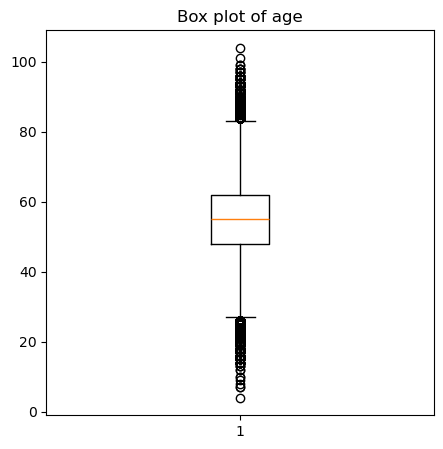

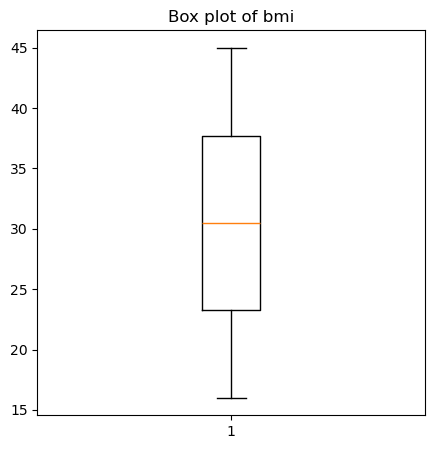

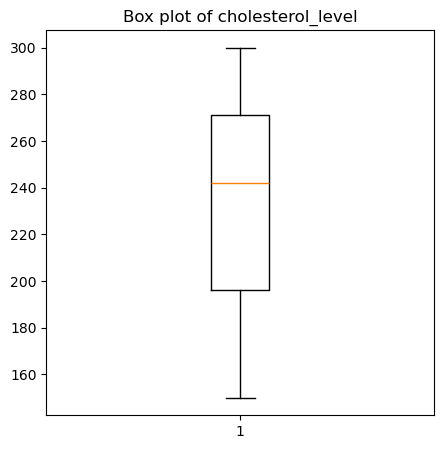

In [35]:
plot_cols = ['age','bmi','cholesterol_level']
for col in plot_cols:
    plt.figure(figsize=(5, 5))
    plt.boxplot(df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

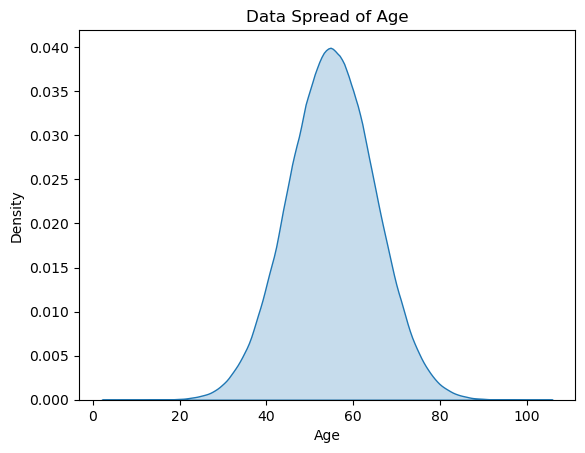

In [40]:
#KDE plot of Age

sns.kdeplot(df['age'], fill=True)
plt.title('Data Spread of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

The distribution of age is somewhat skewed, likely positively (right-skewed) due to the greater spread and presence of higher outliers, although there are also many lower outliers. The majority of individuals in this dataset fall within the age range of approximately 25 to 83. However, there are numerous individuals who are significantly younger or older than this central range, suggesting a wide variation in age within the dataset. The median age is around 55-56

Creating Age Groups like child, adults, old

In [48]:
def create_age_group(age):
    if age <= 17:
        return 'Child'
    elif age <= 64:
        return 'Adult'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(create_age_group)
df['age_group'].head()

0     Adult
1     Adult
2    Senior
3     Adult
4     Adult
Name: age_group, dtype: object

In [52]:
age_group_counts = df['age_group'].value_counts()
age_group_counts

age_group
Adult     737825
Senior    152099
Child         76
Name: count, dtype: int64

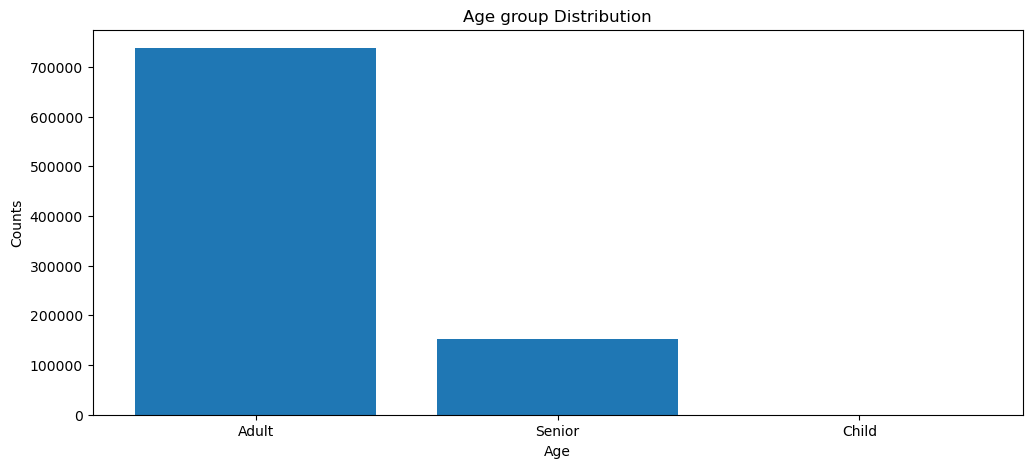

In [55]:
plt.figure(figsize=(12,5))
plt.bar(age_group_counts.index, age_group_counts.values)
plt.title('Age group Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

Based on 890000 recors Adults are on high risk of Lung cancer with almost 75k in numbers whereas the Seniors are second compared with adults with almost 15k in numbers. Childrens are negligible in the count. 

In [56]:
gender_counts = df['gender'].value_counts()
gender_counts

gender
Male      445134
Female    444866
Name: count, dtype: int64

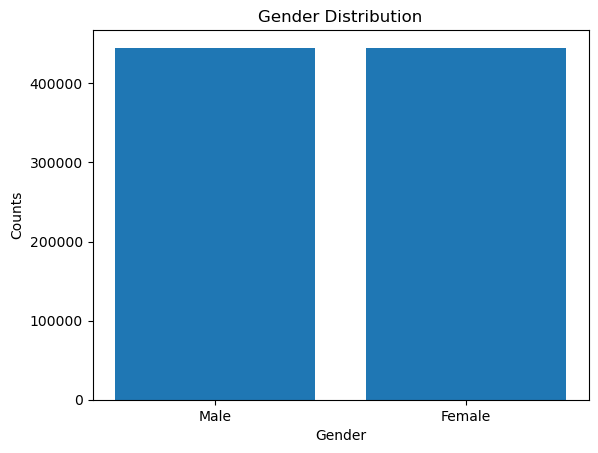

In [57]:
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

Male and Female are equally distributed across the dataset.

In [58]:
df.columns

Index(['age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived', 'month', 'year', 'end_month',
       'end_year', 'age_group'],
      dtype='object')

In [67]:
bar_columns = ['country','cancer_stage','family_history','smoking_status','hypertension','asthma','cirrhosis','other_cancer','treatment_type','survived'] 


Value counts for 'country':
country
Malta             33367
Ireland           33243
Portugal          33208
France            33199
Sweden            33161
Croatia           33138
Greece            33052
Spain             33042
Netherlands       33040
Denmark           33024
Slovenia          33005
Belgium           32986
Hungary           32981
Romania           32963
Poland            32949
Italy             32948
Germany           32940
Estonia           32893
Czech Republic    32885
Lithuania         32856
Slovakia          32853
Austria           32832
Finland           32798
Luxembourg        32794
Cyprus            32719
Latvia            32565
Bulgaria          32559
Name: count, dtype: int64


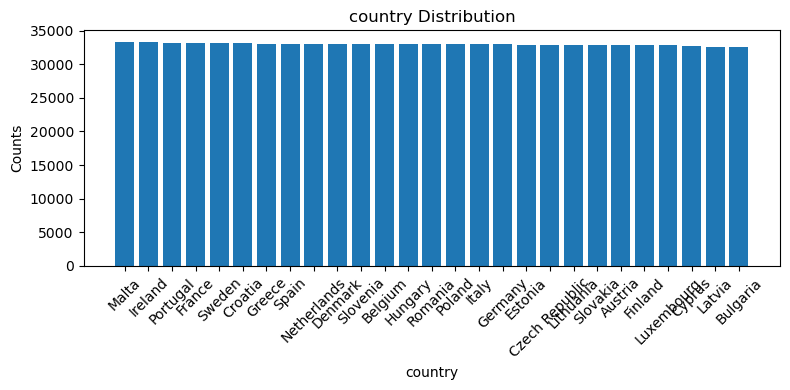

----------------------------------------

Value counts for 'cancer_stage':
cancer_stage
Stage III    222594
Stage IV     222527
Stage I      222516
Stage II     222363
Name: count, dtype: int64


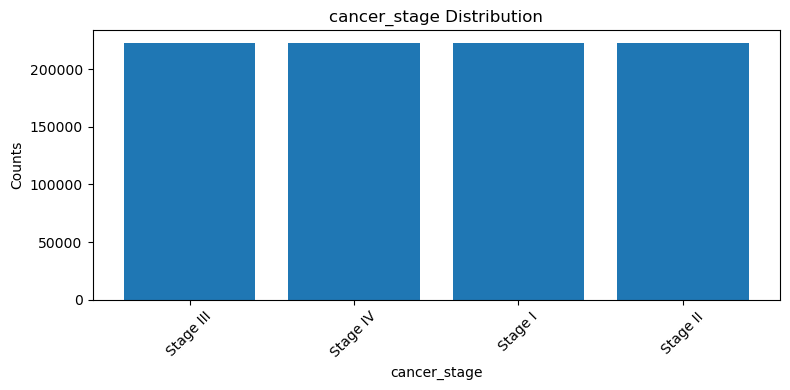

----------------------------------------

Value counts for 'family_history':
family_history
No     445181
Yes    444819
Name: count, dtype: int64


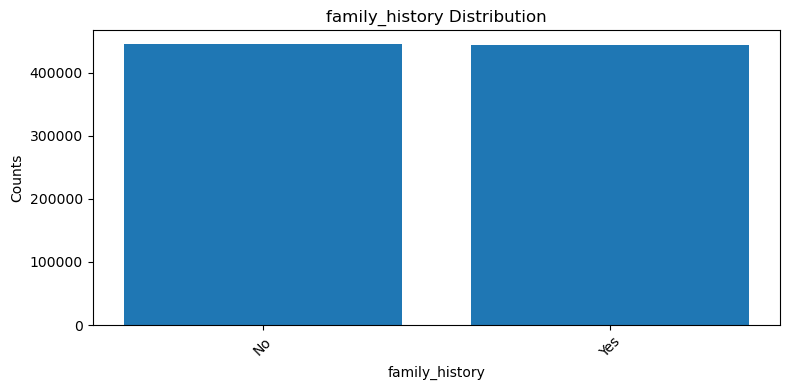

----------------------------------------

Value counts for 'smoking_status':
smoking_status
Passive Smoker    223170
Never Smoked      222751
Former Smoker     222181
Current Smoker    221898
Name: count, dtype: int64


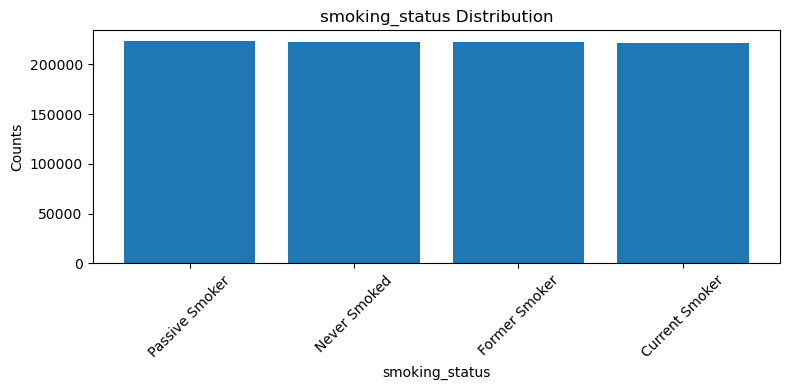

----------------------------------------

Value counts for 'hypertension':
hypertension
1    667521
0    222479
Name: count, dtype: int64


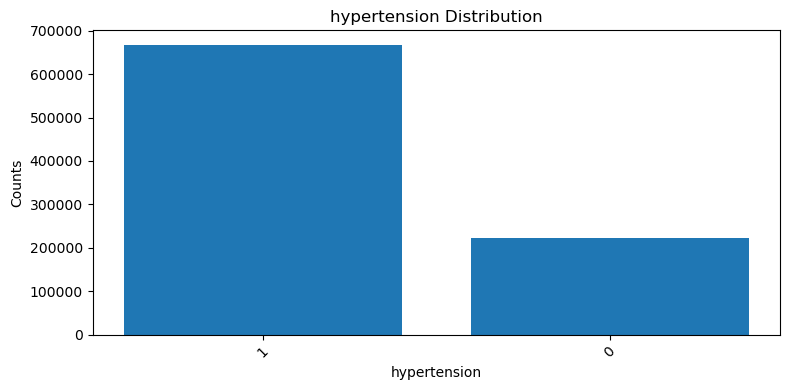

----------------------------------------

Value counts for 'asthma':
asthma
0    471931
1    418069
Name: count, dtype: int64


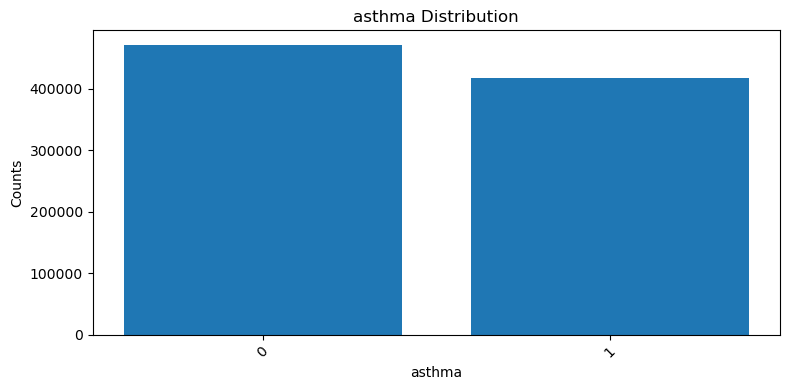

----------------------------------------

Value counts for 'cirrhosis':
cirrhosis
0    688899
1    201101
Name: count, dtype: int64


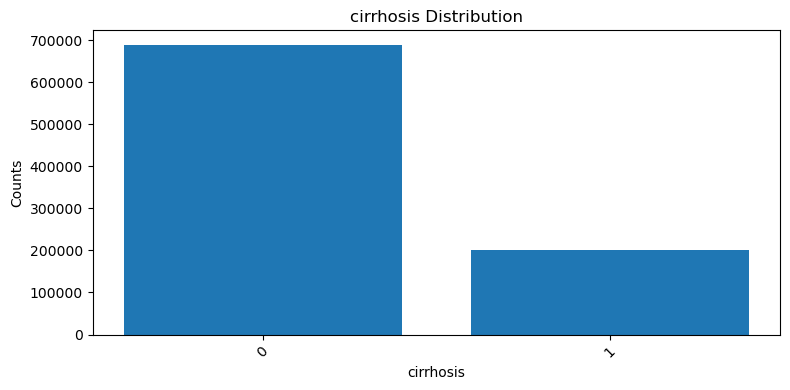

----------------------------------------

Value counts for 'other_cancer':
other_cancer
0    811540
1     78460
Name: count, dtype: int64


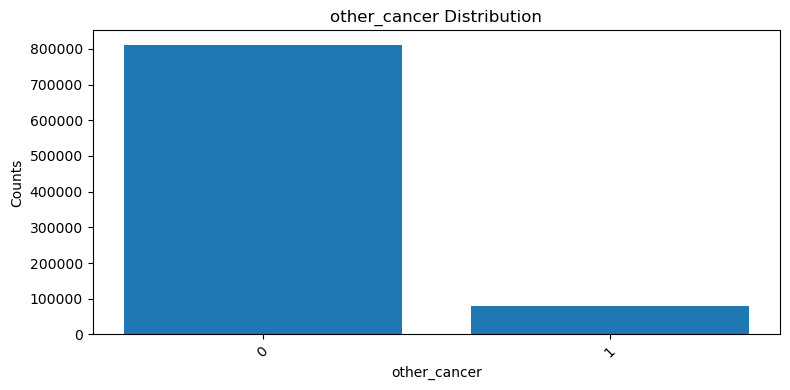

----------------------------------------

Value counts for 'treatment_type':
treatment_type
Chemotherapy    223262
Surgery         223261
Combined        222609
Radiation       220868
Name: count, dtype: int64


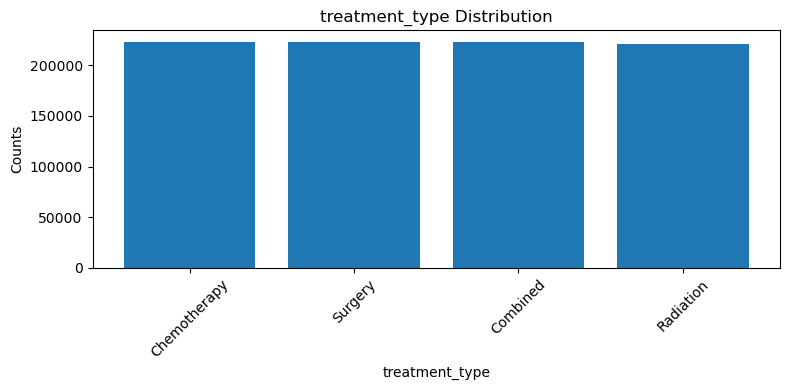

----------------------------------------

Value counts for 'survived':
survived
0    693996
1    196004
Name: count, dtype: int64


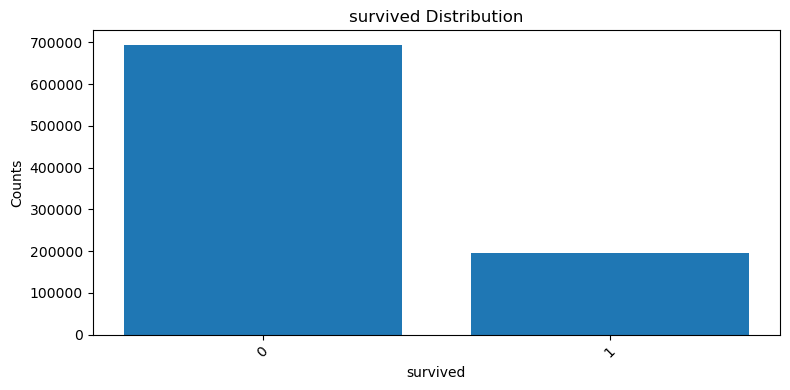

----------------------------------------


In [68]:
for col in bar_columns:
    print(f"\nValue counts for '{col}':")
    counts = df[col].value_counts()
    print(counts)
    
    plt.figure(figsize=(8, 4))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("-" * 40)

Columns such as Country, cancer_stage, family_history, smoking_status, treatment_type are equally distributed among the data set

For columns such as Hypertension we can see that the people with lung cancer mostly suffer from Hypertension as well. Whereas for the asthma we can see people with lung cancer have may have asthma too. But when we see cirrhosis report we see that people suffering from lung cancer may not have cirrhosis. It is also not necessary people who are diagnosed with cancer may have other cancers as well. 

**Bivariate**

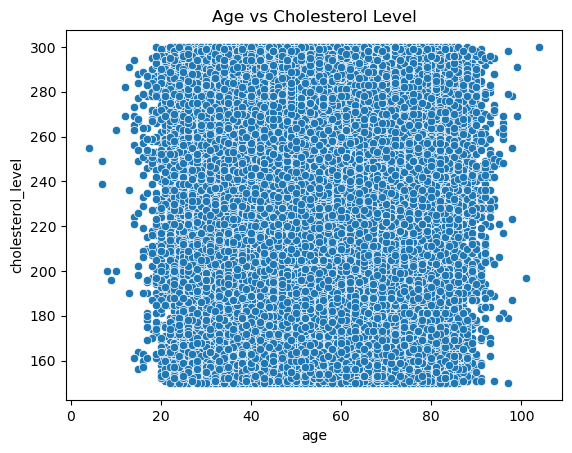

In [70]:
sns.scatterplot(data=df, x='age', y='cholesterol_level')
plt.title('Age vs Cholesterol Level')
plt.show()

This scatter plot suggests that within this dataset, age does not appear to be a strong predictor of cholesterol level in a linear fashion. There's a wide variability in cholesterol levels across almost all age groups, and individuals of similar ages can have vastly different cholesterol readings. If there is any relationship, it's likely non-linear or masked by a high degree of individual variation and other unobserved factors

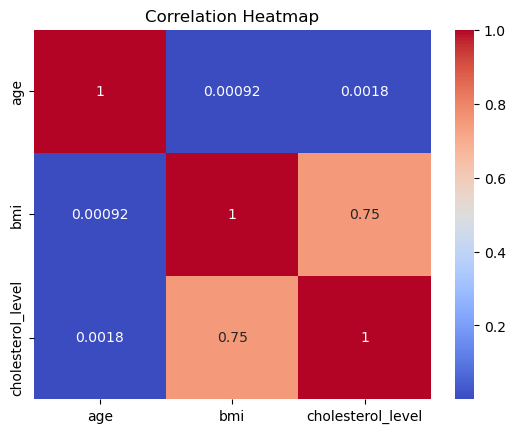

In [71]:
sns.heatmap(df[['age', 'bmi', 'cholesterol_level']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The cell at the intersection of **bmi** and **cholesterol_level** (and vice versa) shows a value of '0.75' and is colored in an orange-red shade, indicating a strong positive correlation.  
Interpretation: This means that as **Body Mass Index (BMI)** increases, cholesterol levels tend to increase significantly, and vice versa. There is a substantial linear relationship between these two variables.  
The cell at the intersection of 'age' and 'bmi' (and vice versa) shows a value of '0.00092' and is colored in a light blue shade, very close to white/grey, indicating a very weak positive correlation, almost negligible.  
Interpretation: This suggests that there is practically no linear relationship between age and BMI in this dataset. As age increases, BMI does not consistently increase or decrease.  
The cell at the intersection of 'age' and 'cholesterol_level' (and vice versa) shows a value of '0.0018' and is colored in a light blue shade, very close to white/grey, indicating a very weak positive correlation, almost negligible.  
Interpretation: This indicates that there is practically no linear relationship between age and cholesterol level in this dataset. As age increases, cholesterol levels do not consistently increase or decrease in a linear fashion. This aligns with the previous scatter plot interpretation.  

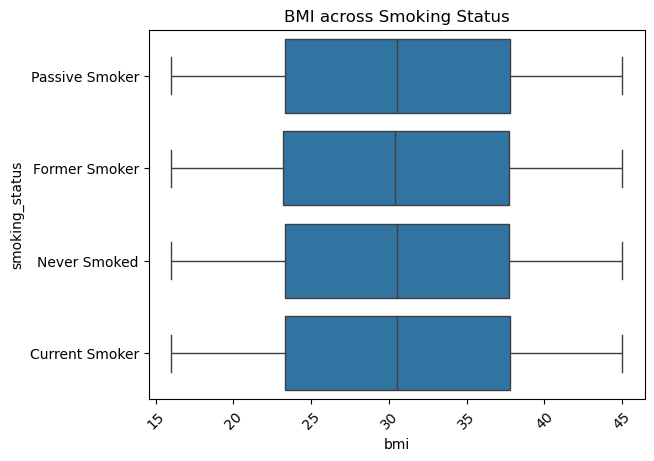

In [73]:
sns.boxplot(data=df, x='bmi', y='smoking_status')
plt.title('BMI across Smoking Status')
plt.xticks(rotation=45)
plt.show()

The BMI spread of the Smoker types are evenly distributed.  
Overall Observation: At a glance, the box plots for all four smoking status categories (Passive Smoker, Former Smoker, Never Smoked, Current Smoker) appear remarkably similar in terms of their central location (median), spread (interquartile range), and overall range.  

**Median BMI:**  
For all groups, the median BMI (the line inside the box) seems to fall roughly around 30. This suggests that the typical BMI across all smoking status categories is around 30, which is generally considered in the obese range (BMI of 30 or greater).  
**Interquartile Range (IQR):**  
The boxes themselves, representing the middle 50% of BMI values, are consistently spanning from approximately 25 to 37-38 across all categories. This indicates a similar spread of BMI within the central portion of each group.  
**Whiskers:**  
The whiskers for all groups extend to similar minimum and maximum BMI values, generally from around 18-20 up to about 45. This suggests that the overall range of BMI, excluding extreme outliers (which are not explicitly shown as individual points in these plots), is consistent across the smoking statuses.  
**Symmetry/Skewness:**
The median line is generally in the middle of the box for all groups, suggesting that the distribution of BMI within each smoking status category is relatively symmetrical, or at least not strongly skewed in one direction.


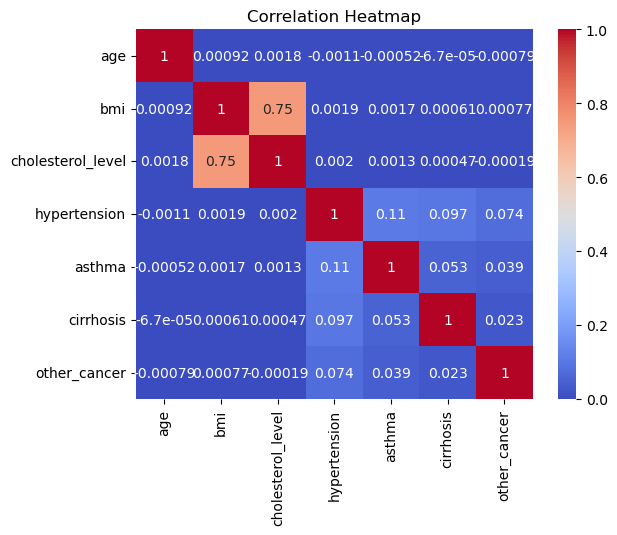

In [81]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(columns=["survived","month","year","end_month","end_year"])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

We have already see the corelation between age, bmi and cholesterol. But when we see the relation ship between other features we see a low positive co realtion with small values.  
The intersection block between Asthma and hypertension is around 0.11. There is a very weak positive linear relationship between Asthma and Hypertension (correlation of 0.11). This suggests a slight tendency for hypertension to be higher when asthma is higher, but the relationship is not strong and many other factors are likely more influential..

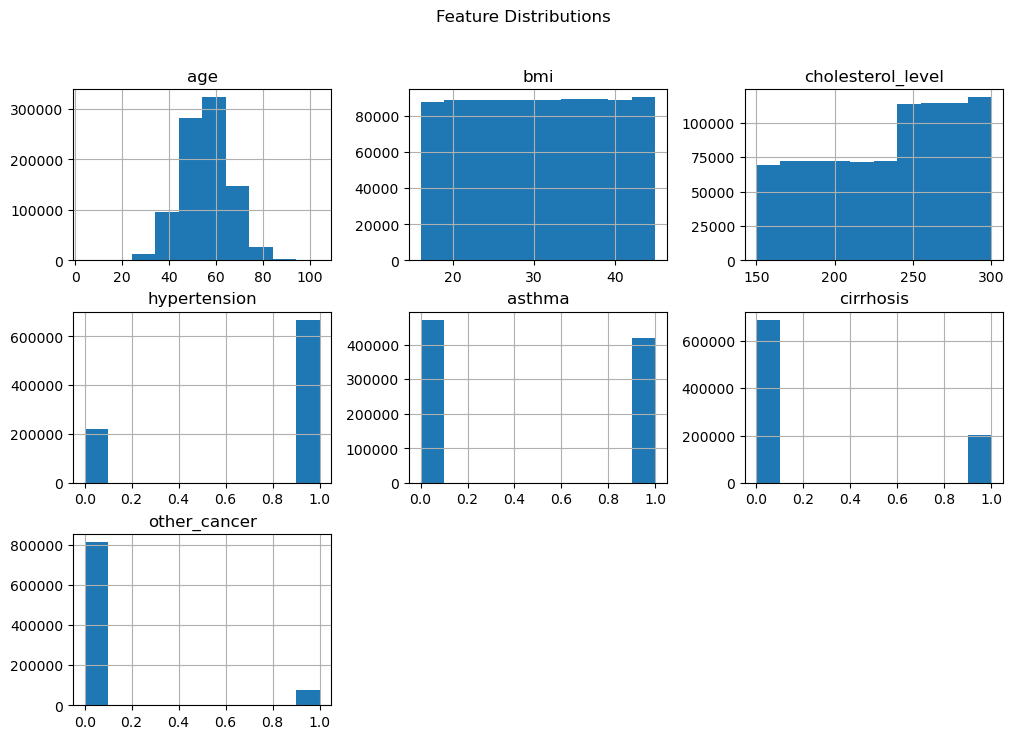

In [82]:
numeric_df.hist(figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.show()

age:

Interpretation: The distribution of 'age' appears to be somewhat bell-shaped or slightly left-skewed, with the majority of individuals falling in the middle age ranges. The peak is roughly between 50 and 70 years old. There are fewer individuals at very young ages (e.g., below 20) and fewer at very old ages (e.g., above 90). The x-axis ranges from about 0 to 100 years.
bmi:

Interpretation: The 'bmi' histogram shows a distribution that is fairly concentrated, with a peak around 30-35. It seems to be somewhat skewed to the right (positively skewed), meaning there's a tail of higher BMI values. The x-axis ranges approximately from 15 to 45, indicating most individuals are within this BMI range. The distribution appears relatively normal-like but truncated on the left.
cholesterol_level:

Interpretation: The 'cholesterol_level' histogram shows a multi-modal or somewhat bimodal distribution. There's a notable peak around 180-200, and another, larger peak around 270-300. This suggests that there might be distinct groups of individuals within the dataset having different cholesterol level ranges. The x-axis ranges from approximately 150 to 300.
hypertension:

Interpretation: This is a binary (or categorical) feature. The histogram shows two bars: one at 0 and one at 1. The bar at 0 is significantly taller, indicating that a large majority of individuals in the dataset do not have hypertension. The bar at 1, while present, is much shorter, meaning a smaller proportion of individuals do have hypertension. This indicates an imbalanced dataset for this feature.
asthma:

Interpretation: Similar to 'hypertension', 'asthma' is also a binary/categorical feature. The histogram shows a much taller bar at 0 than at 1. This means that most individuals in the dataset do not have asthma, while a smaller proportion do have asthma. This also indicates an imbalanced distribution for this feature.
cirrhosis:

Interpretation: 'cirrhosis' is another binary/categorical feature. The bar at 0 is overwhelmingly taller than the bar at 1. This indicates a highly imbalanced dataset, where an extremely large majority of individuals do not have cirrhosis, and only a very small fraction do have cirrhosis.
other_cancer:

Interpretation: 'other_cancer' is also a binary/categorical feature, and it shows the most extreme imbalance among the binary features. The bar at 0 is significantly taller than all other bars, indicating that almost all individuals in the dataset do not have other forms of cancer, with only a minuscule proportion who do.
Summary of Distributions:

Continuous/Numerical Features (age, bmi, cholesterol_level):
age: Fairly normal-like, slightly left-skewed, centered in middle ages.
bmi: Roughly normal-like, concentrated in the healthy to overweight range, with a tail towards higher BMIs.
cholesterol_level: Appears bimodal or multi-modal, suggesting distinct groups or underlying patterns in cholesterol levels.
Binary/Categorical Features (hypertension, asthma, cirrhosis, other_cancer):
All these features show significant class imbalance, with the majority of observations falling into the '0' category (absence of the condition). 'Cirrhosis' and 'other_cancer' are particularly imbalanced, suggesting that these conditions are rare in this dataset.

In [84]:
df.columns

Index(['age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived', 'month', 'year', 'end_month',
       'end_year', 'age_group'],
      dtype='object')

In [93]:
df['treatment_duration'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days 

In [94]:
df['treatment_duration'].describe()

count    890000.000000
mean        458.087170
std         139.326048
min         183.000000
25%         367.000000
50%         458.000000
75%         550.000000
max         730.000000
Name: treatment_duration, dtype: float64

**On an average the number of days required for the diagnosis of a person is 458 days**  
The minimum days stand at 183 days  
and the max days stand at 730 days

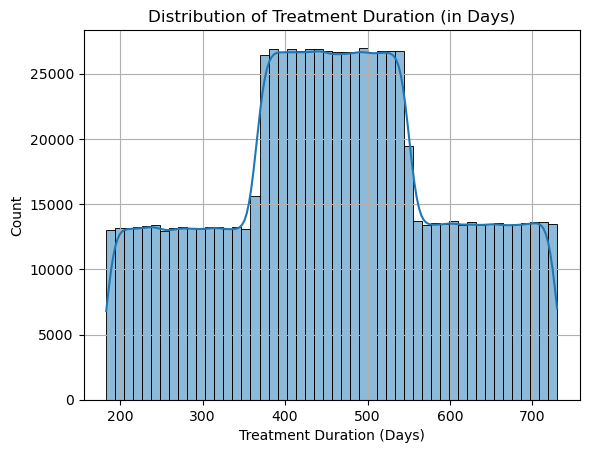

In [95]:
sns.histplot(df['treatment_duration'], bins=50, kde=True)
plt.title("Distribution of Treatment Duration (in Days)")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

X axis represent the days which start from somewhere around 180 days and lasts for 730 days.  
Y represent the frequency of counts of the duration between start date of diagnosis and End date of the treatments of different records.  
The distribution is highly unusual and not typical of natural phenomena. It appears to be multi-modal and somewhat rectangular or flat in certain segments, particularly the central one.  
Three Distinct Peaks/Plateaus:

First Plateau/Peak (around 200-350 days): There's a segment where the count is relatively consistent, around 12,000 to 13,000 observations. This suggests a significant number of treatments last within this shorter duration range.  
Second, Highest Plateau/Peak (around 380-550 days): This is the most prominent feature. There's a very high and consistent count of observations, reaching around 26,000 to 27,000. This indicates that a very large proportion of treatments have a duration within this specific central range. The KDE curve also shows a clear flat top in this region.  
Third Plateau/Peak (around 580-720 days): Similar to the first, there's another segment where the count is relatively consistent, around 13,000 to 14,000 observations. This represents another substantial group of treatments lasting longer.  
The distribution of treatment duration is highly structured, featuring three distinct plateaus, with a very prominent and consistent group of treatments lasting between approximately 380 and 550 days. The sharp boundaries between these plateaus strongly suggest underlying discrete processes or data handling practices rather than a continuous, naturally varying phenomenon.

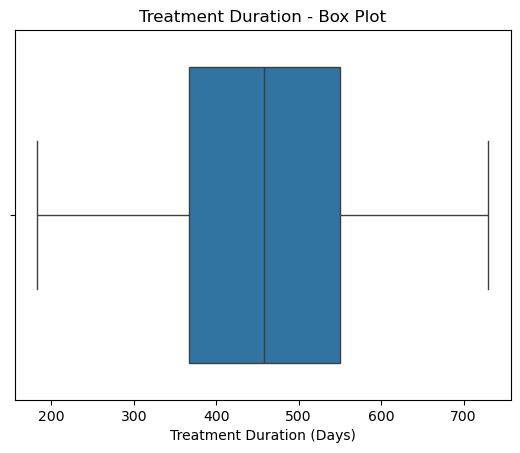

In [97]:
sns.boxplot(x=df['treatment_duration'])
plt.title("Treatment Duration - Box Plot")
plt.xlabel("Treatment Duration (Days)")
plt.show()

There are no outliers in the days and the average number of days is spread between 280 to 560 days. The whiskers starts from 180 days to 730 days

In [102]:
cancer_stage_duration = df.groupby('cancer_stage')['treatment_duration'].mean()
cancer_stage_duration

cancer_stage
Stage I      512.635118
Stage II     475.885242
Stage III    440.314038
Stage IV     403.535445
Name: treatment_duration, dtype: float64

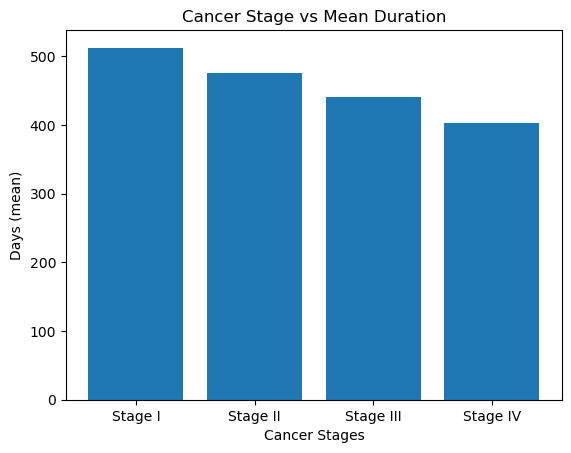

In [101]:
plt.bar(cancer_stage_duration.index,cancer_stage_duration.values)
plt.title('Cancer Stage vs Mean Duration')
plt.xlabel('Cancer Stages')
plt.ylabel('Days (mean)')
plt.show()

The bar plot clearly shows a decreasing trend in mean duration as the cancer stage advances.  

**Stage I**: Has the highest mean duration, approximately 510-520 days.  
**Stage II**: Shows a slightly lower mean duration, around 480-490 days.  
**Stage III**: Continues the downward trend, with a mean duration of about 440-450 days.  
**Stage IV**: Has the lowest mean duration among all stages, roughly 400-410 days.  

In [104]:
age_group_duration = df.groupby('age_group')['treatment_duration'].mean()
age_group_duration

age_group
Adult     458.027363
Child     432.236842
Senior    458.390206
Name: treatment_duration, dtype: float64

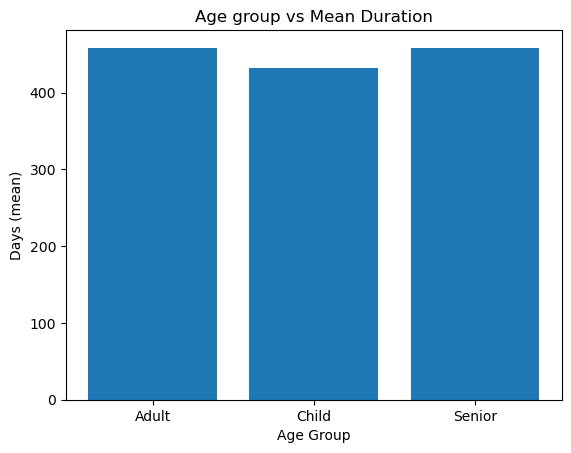

In [105]:
plt.bar(age_group_duration.index,age_group_duration.values)
plt.title('Age group vs Mean Duration')
plt.xlabel('Age Group')
plt.ylabel('Days (mean)')
plt.show()

In [116]:
Age_vs_type_vs_duration = df.groupby(['treatment_type', 'age_group'])['treatment_duration'].mean().reset_index()

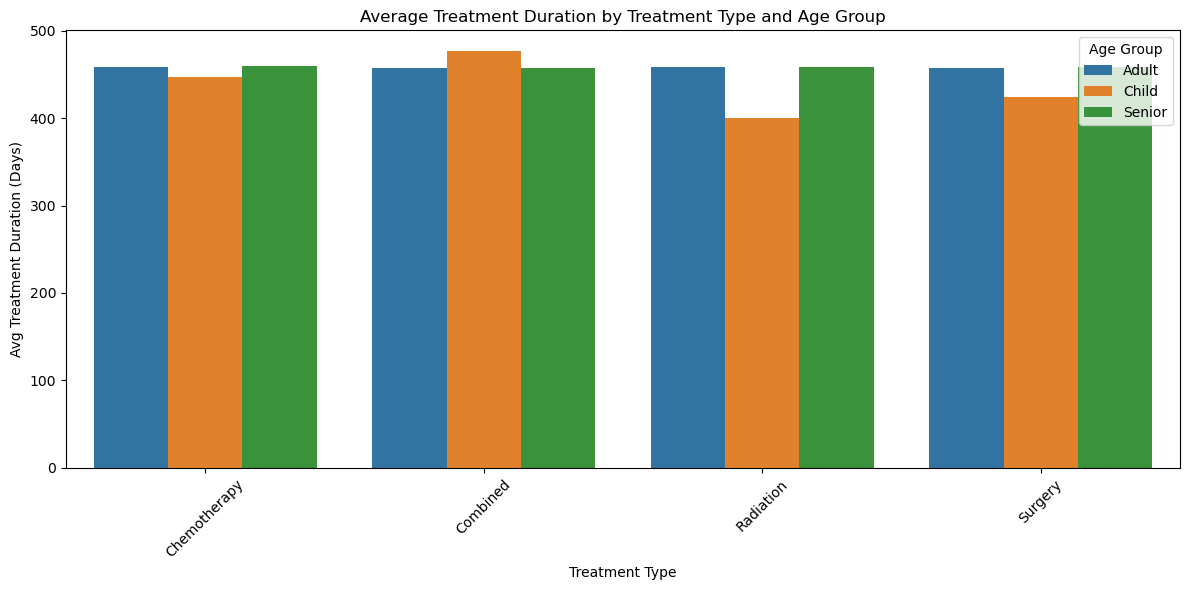

In [117]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=Age_vs_type_vs_duration,
    x='treatment_type',
    y='treatment_duration',
    hue='age_group'
)
plt.title("Average Treatment Duration by Treatment Type and Age Group")
plt.xlabel("Treatment Type")
plt.ylabel("Avg Treatment Duration (Days)")
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analysis by Treatment Type:  
**Chemotherapy**:  
 
Adult: Average duration is around 460 days.    
Child: Average duration is slightly lower, around 450 days.  
Senior: Average duration is similar to adults, around 460 days.  
Interpretation: For Chemotherapy, the average duration is quite consistent across all age groups, with children having a marginally shorter duration.  

**Combined**:  
Adult: Average duration is around 460 days.  
Child: Average duration is the highest in this category, peaking at around 475 days.  
Senior: Average duration is around 460 days.  
Interpretation: When treatments are combined, children seem to have a slightly longer average treatment duration compared to adults and seniors.  

**Radiation**:  
Adult: Average duration is around 460 days.  
Child: Average duration is noticeably lower, around 400 days.  
Senior: Average duration is around 460 days.  
Interpretation: For Radiation treatment, children have a significantly shorter average duration compared to adults and seniors. This is the most pronounced difference observed across age groups for a single treatment type.  

**Surgery**:  
Adult: Average duration is around 460 days.  
Child: Average duration is lower, around 425 days.  
Senior: Average duration is around 460 days.  
Interpretation: Similar to Radiation, children undergoing Surgery also tend to have a shorter average treatment duration than adults and seniors, though the difference is not as stark as with Radiation.  

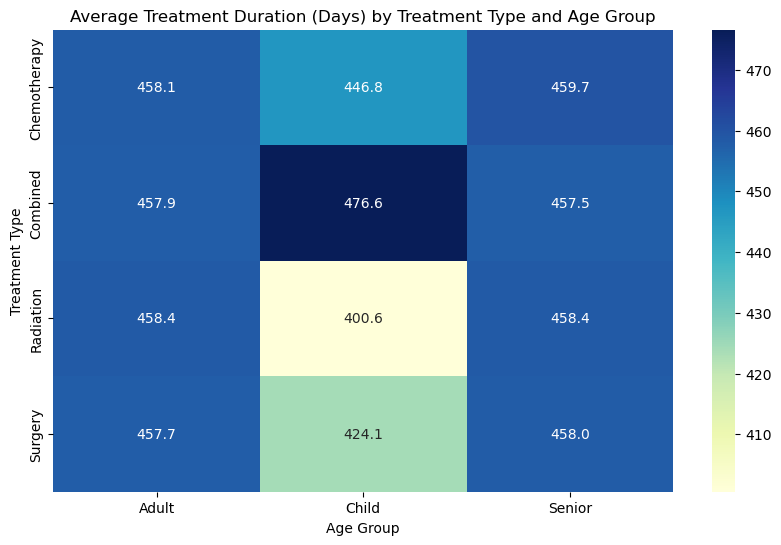

In [118]:
pivot_df = Age_vs_type_vs_duration.pivot(index='treatment_type', columns='age_group', values='treatment_duration')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Average Treatment Duration (Days) by Treatment Type and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Treatment Type")
plt.show()

Adult Age Group:  

Chemotherapy: 458.1 days (medium blue)  
Combined: 457.9 days (medium blue)  
Radiation: 458.4 days (medium blue)  
Surgery: 457.7 days (medium blue)  
Interpretation: Adults show remarkably consistent average treatment durations across all four treatment types, all clustering around 458 days.  
  
Child Age Group:  
Chemotherapy: 446.8 days (light blue)  
Combined: 476.6 days (darkest blue) - This is the highest average duration in the entire matrix.  
Radiation: 400.6 days (lightest yellow) - This is the lowest average duration in the entire matrix.  
Surgery: 424.1 days (light green)  
Interpretation: Children show the most variability in average treatment duration. They have the highest average duration for Combined treatments and the lowest for Radiation treatments. Their average durations for Chemotherapy and Surgery are also lower than those for adults and seniors.  
  
Senior Age Group:  
Chemotherapy: 459.7 days (medium blue)  
Combined: 457.5 days (medium blue)  
Radiation: 458.4 days (medium blue)  
Surgery: 458.0 days (medium blue)  
Interpretation: Similar to adults, seniors also exhibit very consistent average treatment durations across all treatment types, all hovering around 458-460 days.  

**Summarize**
This Jupyter Notebook analyzes a lung cancer dataset to examine relationships between patient attributes (age, gender, BMI, cholesterol, etc.) and treatment types (chemotherapy, radiation, surgery, combined). It uses data visualization and descriptive statistics to explore trends such as:

Treatment duration across age groups and treatment types (e.g., children receiving radiation tend to have shorter durations).

Health conditions like hypertension and asthma are more common in lung cancer patients, while cirrhosis is less associated.

Age and BMI distributions show lung cancer is more prevalent in middle-aged individuals with slightly elevated BMI levels.

The dataset includes demographic, diagnostic, and treatment-related variables for comprehensive analysis.